# A4. Activitat de connexió a MySQL amb python

Primer de tot importam les llibreries que emprarem durant l'activitat i ens connectam al sevidor de mysql i a al db sakila

In [81]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="CalaMandia",
  database="sakila"
)

## Histograma del nombre de pel·lícules i quines categories hi ha

Importam la taula film_category i la convertim a df

In [82]:
labels=[]
mycursor = mydb.cursor()
mycursor.execute("desc film_category")
myresult = mycursor.fetchall()
for x in myresult:
    print(x[0])
    labels.append(x[0])

film_id
category_id
last_update


In [83]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM film_category")
myresult = mycursor.fetchall()
film_category = pd.DataFrame(myresult, columns=labels)

In [84]:
film_category.head()

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09
1,2,11,2006-02-15 05:07:09
2,3,6,2006-02-15 05:07:09
3,4,11,2006-02-15 05:07:09
4,5,8,2006-02-15 05:07:09


Després importam la taula category i també la convertim a df

In [135]:
labels2=[]
mycursor = mydb.cursor()
mycursor.execute("desc category")
myresult = mycursor.fetchall()
for x in myresult:
    print(x[0])
    labels2.append(x[0])

category_id
name
last_update


In [136]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM category")
myresult = mycursor.fetchall()
category = pd.DataFrame(myresult, columns=labels2)

In [137]:
category.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [142]:
category['name'].unique()

array(['Action', 'Animation', 'Children', 'Classics', 'Comedy',
       'Documentary', 'Drama', 'Family', 'Foreign', 'Games', 'Horror',
       'Music', 'New', 'Sci-Fi', 'Sports', 'Travel'], dtype=object)

In [143]:
category['name'].count()

16

Aquí veim el resultat de l'activitat que ens demana quantes i quines categories hi ha

A continuació aplicam el mètode merge() per unir les dues taules a partir de l'atribut 'category_id'

In [98]:
cat_merge = pd.merge(category, film_category, on='category_id', how='inner')

In [99]:
cat_merge.head()

,category_id,name,last_update_x,film_id,last_update_y
0,1,Action,2006-02-15 04:46:27,19,2006-02-15 05:07:09
1,1,Action,2006-02-15 04:46:27,21,2006-02-15 05:07:09
2,1,Action,2006-02-15 04:46:27,29,2006-02-15 05:07:09
3,1,Action,2006-02-15 04:46:27,38,2006-02-15 05:07:09
4,1,Action,2006-02-15 04:46:27,56,2006-02-15 05:07:09


Ara cream l'histograma

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

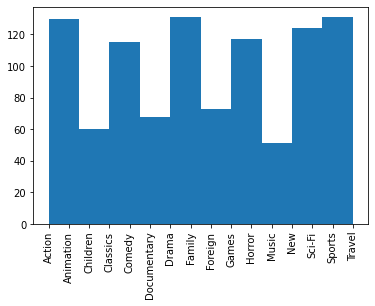

In [127]:
plt.hist(cat_merge["name"])
plt.xticks(rotation='vertical')

Aquí veim la quantitat de pel·lícules que hi ha dde cada categoria

## Dibuixa un histograma dels pagaments fets

Primer de tot importam la taula actor i la convertim en un df

In [116]:
labels5=[]
mycursor = mydb.cursor()
mycursor.execute("desc payment")
myresult = mycursor.fetchall()
for x in myresult:
    print(x[0])
    labels5.append(x[0])

payment_id
customer_id
staff_id
rental_id
amount
payment_date
last_update


In [120]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM payment")
myresult = mycursor.fetchall()
payment = pd.DataFrame(myresult, columns=labels5)

In [121]:
payment.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


(array([3001.,  639., 3542., 1116., 5095., 1119.,  675.,  486.,  257.,
         114.]),
 array([ 0.   ,  1.199,  2.398,  3.597,  4.796,  5.995,  7.194,  8.393,
         9.592, 10.791, 11.99 ]),
 <a list of 10 Patch objects>)

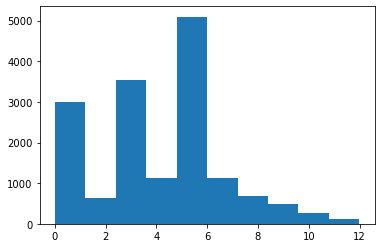

In [126]:
plt.hist(payment["amount"])

Aquí veim l'histograma de la quantitat dels pagaments

## Quants de clients no estan en actiu?

Importam la taula customers i la convertim a un df

In [101]:
labels3=[]
mycursor = mydb.cursor()
mycursor.execute("desc customer")
myresult = mycursor.fetchall()
for x in myresult:
    print(x[0])
    labels3.append(x[0])

customer_id
store_id
first_name
last_name
email
address_id
active
create_date
last_update


In [102]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM customer")
myresult = mycursor.fetchall()
customer = pd.DataFrame(myresult, columns=labels3)
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [106]:
customer['active'].value_counts()

1    584
0     15
Name: active, dtype: int64

El resultat del codi anterior ens mostra que hi ha 15 clients que no estan en actiu i adicionalment ens mostra que hi ha 584 que si estan en actiu. 

## Quants actors hi ha en total?

Primer de tot importam la taula actor i la convertim en un df

In [109]:
labels4=[]
mycursor = mydb.cursor()
mycursor.execute("desc actor")
myresult = mycursor.fetchall()
for x in myresult:
    print(x[0])
    labels4.append(x[0])

actor_id
first_name
last_name
last_update


In [111]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM actor")
myresult = mycursor.fetchall()
actor = pd.DataFrame(myresult, columns=labels4)
actor.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [112]:
actor['actor_id'].count()

200

El resultat del codi anterior ens mostra que hi ha 200 actors en total